# ISLR Sec 8-3-2 Regression Trees

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

df = pd.read_csv('../Data/Boston.csv')
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


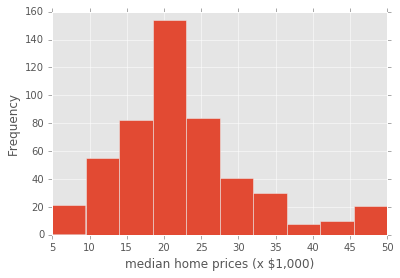

In [2]:
ax = df.medv.plot.hist()
ax.set_xlabel('median home prices (x $1,000)')

In [3]:
TR = DecisionTreeRegressor()
data = df.values
x = data[:,:-1]
y = data[:,-1]
MSE = -1.0*cross_val_score(TR,x,y,cv=10,scoring='mean_squared_error').mean()
print ('test MSE = %0.3f' % MSE)

test MSE = 38.063


In [4]:
for k in range(20):
    TR = DecisionTreeRegressor(max_depth=k+1)
    MSE = -1.0*cross_val_score(TR,x,y,cv=10,
                               scoring='mean_squared_error').mean()
    print ('tree depth = %d  test MSE = %0.3f' % (k+1,MSE))

tree depth = 1  test MSE = 70.537
tree depth = 2  test MSE = 40.221
tree depth = 3  test MSE = 39.685
tree depth = 4  test MSE = 35.435
tree depth = 5  test MSE = 36.273
tree depth = 6  test MSE = 36.140
tree depth = 7  test MSE = 33.564
tree depth = 8  test MSE = 34.379
tree depth = 9  test MSE = 34.448
tree depth = 10  test MSE = 38.613
tree depth = 11  test MSE = 36.201
tree depth = 12  test MSE = 38.592
tree depth = 13  test MSE = 32.594
tree depth = 14  test MSE = 32.385
tree depth = 15  test MSE = 35.101
tree depth = 16  test MSE = 35.191
tree depth = 17  test MSE = 38.048
tree depth = 18  test MSE = 34.509
tree depth = 19  test MSE = 35.514
tree depth = 20  test MSE = 36.334


Note that ISLR reports test MSE of 25.05. How close can you come to this figure?

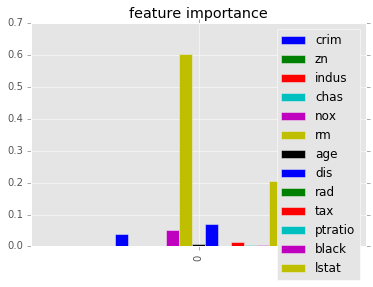

In [5]:
TR = DecisionTreeRegressor(max_depth=7)
TR.fit(x,y)
x = TR.feature_importances_
x = np.reshape(x,(1,len(x)))
pd.DataFrame(x,columns=df.columns[:-1]).plot.bar(title='feature importance')